In [3]:
options(warn=-1)
library(reshape2)
library(ggplot2)

In [22]:
git.dir='~/Dropbox/mutation_rate/20180705miseq/'
out.dir=paste0(git.dir, 'out_downsample/') 
sample.alignments=readRDS(paste0(out.dir, 'sample.alignments.RDS'))

In [23]:
list.string.diff2<-function(query,ref,samp,startindex){
  seq.query<-unlist(strsplit(query,split=""))
  seq.ref<-unlist(strsplit(ref,split=""))
  diff.d<-rbind(seq.query,seq.ref)
  only.diff<-diff.d[,diff.d[1,]!=diff.d[2,]]
  
  start.pos=as.numeric(strsplit(samp,":")[[1]][4])
  pos<-which(diff.d[1,]!=diff.d[2,])+start.pos+startindex-2
  #only.diff<-rbind(pos,only.diff)
  if ((length(pos)>0)==TRUE){
    diff=paste(pos,only.diff[[1]],only.diff[[2]],sep='_')} else {diff = NA}
  return(diff)
}

#################not moving reads not from the start
###this is the one I used
mutation.spect.table.read=function(sample.alignments,libr,samp,variant){
  id_vec=c()
  count_vec=c()
  ref.start=c()
  
  onesample.read=sample.alignments[[libr]][[samp]]
  #startsite=regexpr(onesample.read$ref[1],onesample.read$ref)
  
  #startsite=regexpr(onesample.read$ref,onesample.read$ref[1])
  #filter out reads not match from the start
  #index=which(startsite==1)
  
  #filter readout with less number of reads 
  #few.exp=which(onesample.read$rr.lengths > readcount[[libr]][[samp]][2])
  #few.exp=which(onesample.read$rr.lengths > 20)
  few.exp=which(onesample.read$rr.lengths > 8)
  #index=intersect(few.exp,index)
  
  for (r in few.exp){
  #for (r in 1:length(onesample.read$query)){
    query=onesample.read$query[r]
    ref=onesample.read$ref[r]
    count=onesample.read$rr.lengths[r]
    ref.index=gsub('-','',ref)
    startindex=regexpr(ref.index,onesample.read$ref[1])[1]
    diff=list.string.diff2(query,ref,samp,startindex)
    
    if (is.na(diff[1]==TRUE)) next
    
    for (i in 1:length(diff)){
      if(diff[i] %in% id_vec){
        count_vec[which(id_vec==diff[i])]=count_vec[which(id_vec==diff[i])]+count
      } else {
        id_vec=c(id_vec,diff[i])
        count_vec[which(id_vec==diff[i])]=count
      }
    }
  }
  
  #remove the BY and RM variants
  if (length(which(id_vec %in% variant))>0) {
    count_vec=count_vec[-which(id_vec %in% variant)]
    id_vec=id_vec[-which(id_vec %in% variant)]
  }
  
  spect=rbind(id_vec,count_vec)
  return(spect)
}

In [27]:
variant=c("31451_A_G","31663_A_G","31867_T_C","33002_A_C","33344_C_T","33551_A_G","33613_-_A","33782_C_A","33851_C_T","34040_A_G","34050_G_A","34052_T_A","34324_-_A","34493_C_T","34622_T_C") 

colnum=list(281,230,252,277,281,230,252,277) 
names(colnum)=names(sample.alignments)

exp.read=function(sample.alignments,libr,samp){
  onesample.read=sample.alignments[[libr]][[samp]]
  total.read=sum(onesample.read$rr.lengths)
  exp.read=total.read/colnum[[libr]]
  return(c(total.read,exp.read))
}

readcount=list()

for(libr in names(sample.alignments) ){
  #print(libr)
  for (samp in names(sample.alignments[[libr]])){
    #print(samp)
    readcount[[libr]][[samp]]=exp.read(sample.alignments,libr,samp)
  }
}

mutation.fil=list()

for(libr in names(sample.alignments) ){
  #print(libr)
  for (samp in names(sample.alignments[[libr]])){
    #print(samp)
    #filter out with very little reads
    if (readcount[[libr]][[samp]][1] < 200) next
    mutation.fil[[libr]][[samp]]=mutation.spect.table.read(sample.alignments,libr,samp,variant)
  }
}

In [29]:
head(mutation.fil)

id_vec,33344_T_C,33312_T_A,33344_T_A,33354_T_C,33415_T_C,33213_-_T,33344_-_T,33205_-_G,33206_-_G,33207_-_G,⋯,33344_-_A,33173_-_A,33345_T_A,33205_C_G,33206_C_-,33207_C_-,33346_C_-,33419_T_C,33182_-_C,33441_T_C
count_vec,8847,183,169,147,88,64,121,58,58,58,⋯,35,15,14,12,11,11,11,10,9,9
id_vec,33002_C_A,32945_T_C,33002_T_C,33089_C_A,33090_C_A,32959_G_C,33002_G_C,33111_C_A,33116_C_A,32932_-_T,⋯,33002_A_T,33043_C_A,33015_A_G,32970_T_C,32958_T_C,32947_G_A,33172_C_A,32936_T_C,33159_C_A,33093_C_G
count_vec,4223,148,159,136,136,117,117,98,98,88,⋯,46,30,19,18,16,15,12,11,10,9
id_vec,32882_T_C,32781_T_C,32794_A_C,32842_-_A,32876_C_G,32798_T_G,32692_A_C,32726_-_A,32841_T_C,32717_T_A,⋯,32794_T_C,32843_A_-,32917_C_-,32735_T_G,32854_G_T,32670_-_G,32798_A_G,32858_G_T,32796_T_C,32679_T_C
count_vec,361,249,163,130,107,98,71,69,57,54,⋯,12,11,11,11,10,9,9,9,9,9
id_vec,32557_G_C,32605_A_-,32610_A_-,32660_T_C,32571_G_C,32678_T_C,32571_T_C,32637_-_T,32692_A_C,32573_A_T,⋯,32597_-_C,32669_G_T,32707_C_-,32658_T_C,32581_G_T,32519_-_G,32677_A_T,32563_T_G,32547_T_G,32519_G_-
count_vec,362,274,274,235,223,180,162,144,134,130,⋯,17,16,13,13,12,10,10,10,10,9
id_vec,32075_T_C,32281_-_C,32253_T_G,32274_T_G,32058_C_G,32095_A_C,32081_-_A,32278_G_C,32119_A_C,32271_A_C,⋯,32088_-_C,32223_C_G,32050_A_T,32272_A_G,32295_-_T,32113_-_G,32242_C_A,32030_-_T,32272_T_G,32088_T_C
count_vec,215,185,173,110,105,90,89,79,37,35,⋯,16,16,15,14,12,11,10,9,9,9
id_vec,31867_C_T,31844_T_C,31834_A_G,31930_T_G,31964_A_-,31965_A_-,31908_C_T,31869_T_G,31829_T_G,31867_T_G,⋯,32001_C_T,31890_C_T,31930_C_T,31845_T_C,31747_T_C,31971_-_G,31976_-_G,31862_C_-,31863_C_-,31868_C_-


In [30]:
#function
get_replicated_type  =function(s1, s2)
{
  S1 = unlist(mutation.fil[[s1]])
  S1 = S1[seq(1, length(S1),2)]
  S1_rep = unlist(mutation.fil[[s2]])
  S1_rep = S1_rep[seq(1, length(S1_rep),2)]
  S1_common = intersect(S1, S1_rep)
  #S1_common = union(S1, S1_rep)
  
  all_types = unique(
    unlist(lapply(S1_common, function(x) paste0(strsplit(x,"_")[[1]][2:3],collapse="_")
    )
    ))
  all_types = gsub("-", "N", all_types)
  return(list(this_type=all_types, S_common=S1_common))
}

expand_count = function(ID, S_common, count_mat)
{
this_vec = NULL
this_vec$ID = ID
for(j in 2:ncol(count_mat))
  this_vec[[colnames(count_mat)[j]]] = 0

for(i in 1:length(S_common))
{
  this_type = paste0(strsplit(S_common[i],"_")[[1]][2:3], collapse="_")
  this_type = gsub("-", "N", this_type)
  if(length(this_vec[[this_type]])<1)
  {
    this_vec[[this_type]]=1
  } else {
    this_vec[[this_type]] = this_vec[[this_type]] + 1
  }
}

count_mat =rbind.data.frame(count_mat, this_vec, stringsAsFactors=F)
return(count_mat)
}                   

In [31]:
all_types = unlist(mutation.fil)
all_types = all_types[seq(1,length(all_types),2)]
all_types = unique(
  unlist(lapply(all_types, function(x) paste0(strsplit(x,"_")[[1]][2:3],collapse="_")
  )
  ))
all_types = gsub("-", "N", all_types)

count_mat = matrix(nrow=0, ncol=length(all_types)+1)
colnames(count_mat) = c('ID', all_types)
count_mat = as.data.frame(count_mat, stringsAsFactors=F)


There are 8 PCRs to cover the CAN1 region, and 1 of them is missing in this data set (need to go back to the pear step to decrease the required overlap base pair to be 1). So the expected number of observed mutations are 200*(1700-300)/1700=164. From the table below, the observed mutations are a little less, which is fine. Because some segregants may have the same mutations at the same position, and in that case only one will be counted. 

In [32]:
mutation.fil = rep(mutation.fil, each = 2)
replicate_mat = matrix(names(mutation.fil), ncol=2, byrow = T)
rownames(replicate_mat) = c('S1', 'S2', 'S3', 'S4')
#rownames(replicate_mat) = c('RAD5:R;MKT1:R', 'RAD5:R;MKT1:B', 'RAD5:B;MKT1:R', 'RAD5:B;MKT1:B')

for(i in 1:nrow(replicate_mat))
{
  this_id = rownames(replicate_mat)[i]
  this = get_replicated_type(replicate_mat[i,1], replicate_mat[i,2])
  count_mat = expand_count(this_id, this$S_common, count_mat)
}

In [33]:
count_mat

ID,T_C,T_A,N_T,N_G,N_C,A_C,C_T,A_G,G_A,⋯,N_A,C_N,C_A,G_C,A_T,T_G,A_N,G_T,G_N,T_N
S1,32,6,11,9,13,12,8,11,10,⋯,12,8,16,7,5,15,7,4,2,0
S2,21,7,21,9,15,11,13,38,5,⋯,12,2,18,4,7,18,1,5,13,1
S3,18,5,1,1,3,10,4,6,12,⋯,24,0,26,5,2,10,4,6,6,4
S4,23,17,6,7,11,19,9,10,12,⋯,10,0,20,3,6,13,6,9,14,0


In [34]:
count_mat_tmp=count_mat
count_mat_new=data.frame(
                         CG_GC = count_mat_tmp$C_G+count_mat_tmp$G_C,
                         CA_GT = count_mat_tmp$C_A+count_mat_tmp$G_T,
                         CT_GA = count_mat_tmp$C_T+count_mat_tmp$G_A,
                         AT_TA = count_mat_tmp$A_T+count_mat_tmp$T_A,
                         AC_TG = count_mat_tmp$A_C+count_mat_tmp$T_G,
                         AG_TC = count_mat_tmp$A_G+count_mat_tmp$T_C,
                         insertion = count_mat_tmp$A_N+count_mat_tmp$G_N+count_mat_tmp$T_N+count_mat_tmp$C_N,
                         deletion = count_mat_tmp$N_A+count_mat_tmp$N_G+count_mat_tmp$N_T+count_mat_tmp$N_C
)

In [35]:
count_mat_new

CG_GC,CA_GT,CT_GA,AT_TA,AC_TG,AG_TC,insertion,deletion
16,20,18,11,27,43,17,45
14,23,18,14,29,59,17,57
20,32,16,7,20,24,14,29
5,29,21,23,32,33,20,34


Total number of transitions:

In [36]:
rowSums(count_mat_new[,c(3,6)])

[1] 61 77 40 54

Total number of transversions:

In [37]:
rowSums(count_mat_new[,c(1,2,4,5)])

[1] 74 80 79 89

Total number of indels:

In [38]:
rowSums(count_mat_new[,c(7,8)])

[1] 62 74 43 54

Using ID as id variables


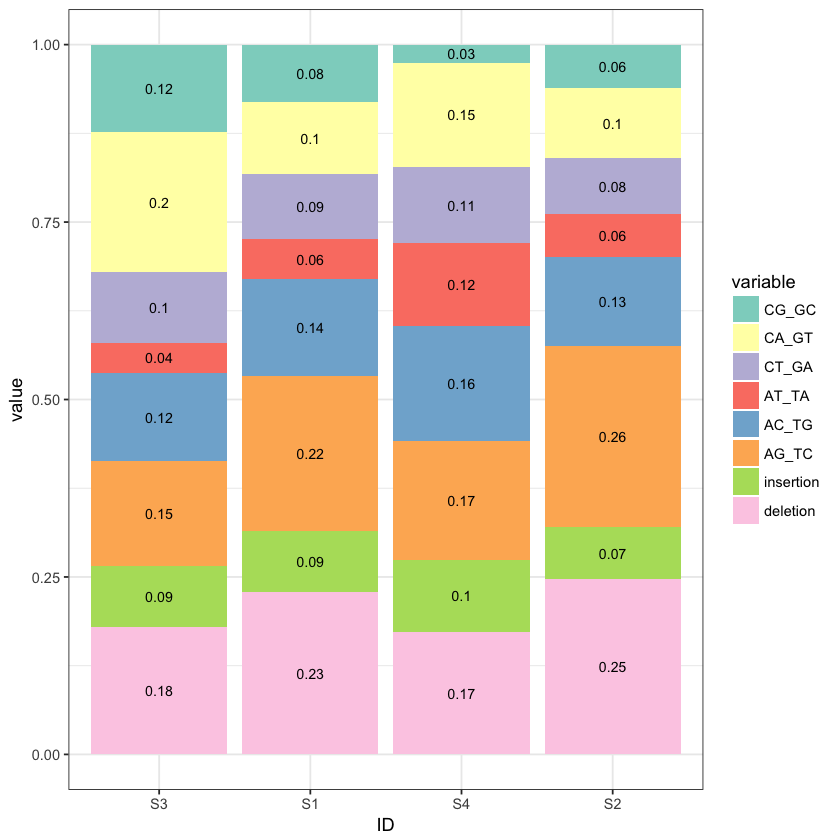

In [39]:
count_mat_new3 = as.matrix(count_mat_new)
group_total = apply(count_mat_new3, 1, sum)

count_mat_new2 = count_mat_new/group_total
count_mat_new2$ID = count_mat$ID
df = melt(count_mat_new2)

#order x axis by mutation rate from low to high
p=ggplot(data=df, aes(x=ID, y=value, fill=variable)) + geom_bar(stat="identity", position="stack") +
  scale_fill_brewer(palette = "Set3") + scale_x_discrete(limits=c('S3', 'S1', 'S4', 'S2') ) +
  geom_text(aes(label=round(value,2)), size =3, position = position_stack(vjust = 0.5)) +
  theme_bw()
print(p)

From above test, RAD5 significantly affect C:G > A:T transversions

Using ID as id variables


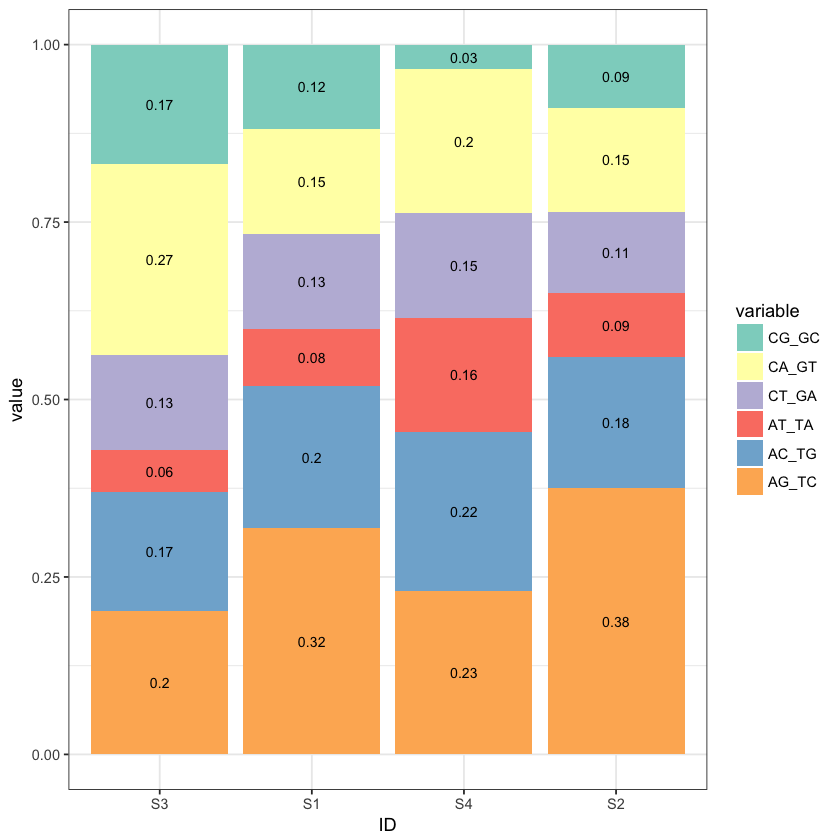

In [40]:
part = count_mat_new2[,1:6]/rowSums(count_mat_new2[,1:6])
part$ID = count_mat$ID
df2=melt(part)
p2=ggplot(data=df2, aes(x=ID, y=value, fill=variable)) + geom_bar(stat="identity", position="stack") +
  scale_fill_brewer(palette = "Set3") + scale_x_discrete(limits=c('S3', 'S1', 'S4', 'S2') ) +
  geom_text(aes(label=round(value,2)), size =3, position = position_stack(vjust = 0.5)) +
  theme_bw()
print(p2)

From above test, MKT1 significantly affect C:G > G:C transversions

In [41]:
#RAD5 effect
count_effectRAD5 = data.frame(RM = as.vector(count_mat_new3[1,]+count_mat_new3[2,]),
                              BY = as.vector(count_mat_new3[3,]+count_mat_new3[4,]),
                              ID = c("CG_GC", "CA_GT", "CT_GA", "AT_TA","AC_TG","AG_TC","insertion","deletion") )

## "CG_GC" "CA_GT" "CT_GA" "AT_TA" "AC_TG" "AG_TC" "insertion" "deletion"
group_total = as.numeric(colSums(count_effectRAD5[,1:2]))
rad5.p.val = c()
for (i in 1:8){
  rad5.p.val[i] = prop.test(as.numeric(count_effectRAD5[i,1:2]), group_total)$p.value
}

In [45]:
#MKT1 effect
count_effectMKT1 = data.frame(RM = as.vector(count_mat_new3[1,]+count_mat_new3[3,]),
                              BY = as.vector(count_mat_new3[2,]+count_mat_new3[4,]),
                              ID = c("CG_GC", "CA_GT", "CT_GA", "AT_TA","AC_TG","AG_TC","insertion","deletion") )

## "CG_GC" "CA_GT" "CT_GA" "AT_TA" "AC_TG" "AG_TC"
group_total = as.numeric(colSums(count_effectMKT1[,1:2]))

mkt1.p.val = c()
for (i in 1:8){
  mkt1.p.val[i] = prop.test(as.numeric(count_effectMKT1[i,1:2]), group_total)$p.value
}

In [46]:
### Record FDR 
all.p.val = c(rad5.p.val, mkt1.p.val)
p.adjust(all.p.val, method='bonferroni')

[1] 1.00000000 0.09253681 1.00000000 1.00000000 1.00000000 0.11815472
 [7] 1.00000000 0.61705905 0.05556181 1.00000000 1.00000000 1.00000000
[13] 1.00000000 1.00000000 1.00000000 1.00000000